In [4]:
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the datasets
calls_df = pd.read_csv('C:\\Users\\Akhil\\AIT Final Project AD\\NYPD_Calls_for_Service__Year_to_Date_.csv')
arrests_df = pd.read_csv('C:\\Users\\Akhil\\AIT Final Project AD\\NYPD_Arrest_Data__Year_to_Date_.csv')



In [6]:
# Data Cleaning
def clean_data(df):
    # Remove duplicate rows
    df = df.drop_duplicates()
    
    # Handle missing values
    # Example: Fill or drop missing values
    df = df.dropna()  # or df.fillna()
    
    # Convert date columns to datetime
    date_columns = df.select_dtypes(include=['object']).columns
    for col in date_columns:
        if 'date' in col.lower() or 'time' in col.lower():
            df[col] = pd.to_datetime(df[col])
    
    return df

calls_df = clean_data(calls_df)
arrests_df = clean_data(arrests_df)

calls_df.to_csv('calls_cleaned.csv', index=False)  # Save to 'calls_cleaned.csv'
arrests_df.to_csv('arrests_cleaned.csv', index=False)  # Save to 'arrests_cleaned.csv'

C:\Users\Akhil\AppData\Local\Temp\ipykernel_13708\880047821.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])


In [ ]:
def analyze_incident_resolution1(calls_df):
    # Calculate resolution time
    calls_df['resolution_time'] = (pd.to_datetime(calls_df['CLOSNG_TS']) - 
                                    pd.to_datetime(calls_df['INCIDENT_TIME'])).dt.total_seconds() / 60
    
    # Top 5 most common incident types
    top_incident_types = calls_df['TYP_DESC'].value_counts().nlargest(5).index
    filtered_df = calls_df[calls_df['TYP_DESC'].isin(top_incident_types)]
    
    # Create a heatmap of average resolution times
    resolution_matrix = filtered_df.pivot_table(
        values='resolution_time', 
        index='BORO_NM', 
        columns='TYP_DESC', 
        aggfunc='mean'
    )
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(resolution_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title('Average Resolution Time Heatmap', fontsize=16)
    plt.xlabel('Incident Type', fontsize=12)
    plt.ylabel('Borough', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    return resolution_matrix

In [ ]:
def analyze_incident_resolution2(calls_df):
    # Calculate resolution time
    calls_df['resolution_time'] = (pd.to_datetime(calls_df['CLOSNG_TS']) - 
                                    pd.to_datetime(calls_df['INCIDENT_TIME'])).dt.total_seconds() / 60
    
    # Create a box plot for better comparison
    plt.figure(figsize=(15, 8))
    import seaborn as sns
    
    sns.boxplot(x='BORO_NM', y='resolution_time', hue='TYP_DESC', 
                data=filtered_df, palette='viridis')
    
    plt.title('Resolution Time Distribution by Borough and Incident Type', fontsize=16)
    plt.xlabel('Borough', fontsize=12)
    plt.ylabel('Resolution Time (Minutes)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


ANOVA Test for Incident Types:
F-statistic: 64.87084771543822
p-value: 0.0


C:\Users\Akhil\AppData\Local\Temp\ipykernel_13708\709931963.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

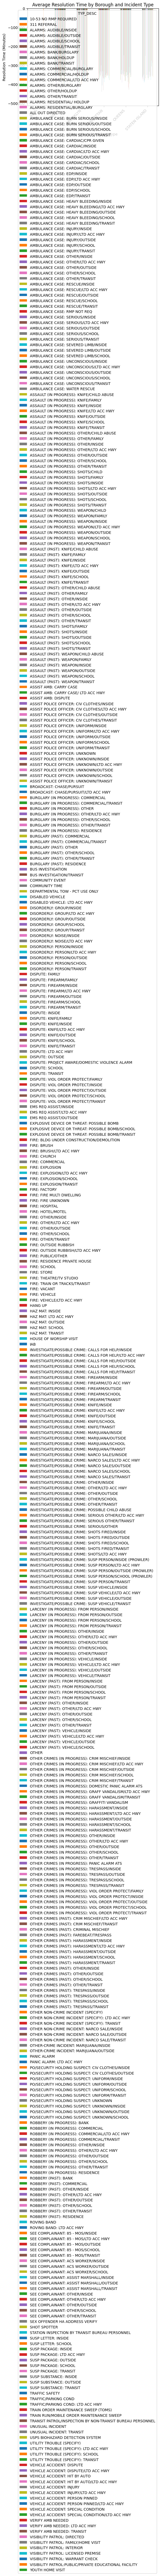

Incident Resolution Summary:
                                                                            mean  \
BORO_NM       TYP_DESC                                                            
(null)        AMBULANCE CASE: EDP/INSIDE                         -408932.450000   
              ASSAULT (PAST): OTHER/INSIDE                       -250442.300000   
              INVESTIGATE/POSSIBLE CRIME: FIREARM/OUTSIDE        -282141.150000   
              SEE COMPLAINANT: OTHER/INSIDE                      -371779.674731   
              SEE COMPLAINANT: OTHER/OUTSIDE                     -299432.736667   
...                                                                         ...   
STATEN ISLAND VISIBILITY PATROL: INTERIOR                        -363166.874295   
              VISIBILITY PATROL: LICENSED PREMISE                -402614.484783   
              VISIBILITY PATROL: WARRANT CHECK                   -276341.050000   
              VISIBILITY PATROL:PUBLIC/PRIVATE EDUCATIONA

In [ ]:
resolution_times = analyze_incident_resolution2(calls_df)
print("Incident Resolution Summary:\n", resolution_times)